# Development and validation of machine learning models for predicting hospital readmission in heart failure patients.

In [3]:
import csv


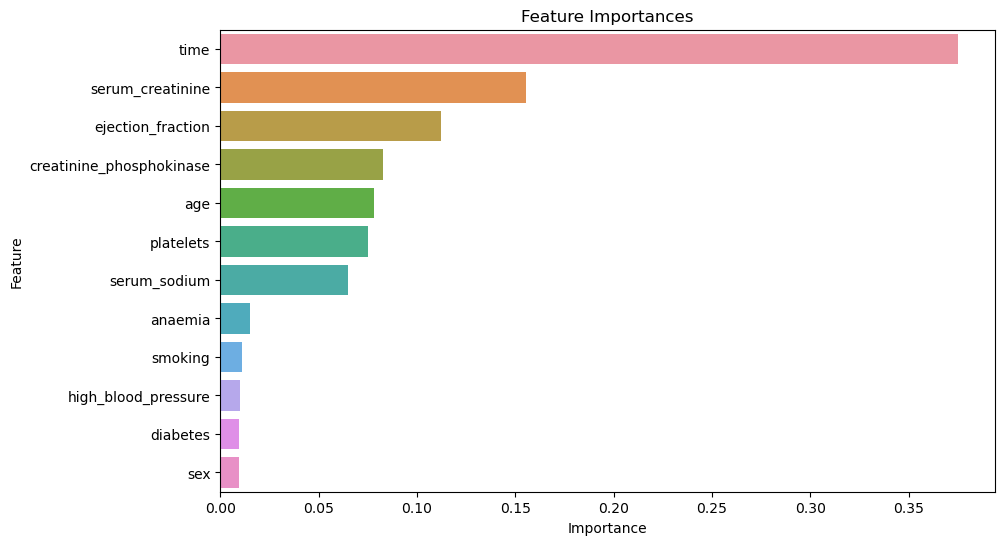

Top 4 features: ['time', 'serum_creatinine', 'ejection_fraction', 'creatinine_phosphokinase']
Logistic Regression - Accuracy: 0.8, Precision: 0.8823529411764706, Recall: 0.6, AUC-ROC: 0.7714285714285715
Random Forest - Accuracy: 0.7, Precision: 0.6842105263157895, Recall: 0.52, AUC-ROC: 0.6742857142857143
Gradient Boosting - Accuracy: 0.7, Precision: 0.7058823529411765, Recall: 0.48, AUC-ROC: 0.6685714285714286
Epoch 1/100
6/6 [==============================] - 4s 128ms/step - loss: 0.6654 - accuracy: 0.6073 - val_loss: 0.6472 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 28ms/step - loss: 0.6288 - accuracy: 0.6492 - val_loss: 0.5985 - val_accuracy: 0.7917
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 0.6166 - accuracy: 0.7382 - val_loss: 0.5490 - val_accuracy: 0.8750
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 0.5927 - accuracy: 0.7435 - val_loss: 0.5071 - val_accuracy: 0.8542
Epoch 5/100
6/6 [=======

6/6 [==============================] - 0s 24ms/step - loss: 0.3313 - accuracy: 0.8534 - val_loss: 0.2901 - val_accuracy: 0.8750
Epoch 57/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3296 - accuracy: 0.8586 - val_loss: 0.2900 - val_accuracy: 0.8542
Epoch 58/100
6/6 [==============================] - 0s 26ms/step - loss: 0.3112 - accuracy: 0.8429 - val_loss: 0.2865 - val_accuracy: 0.8542
Epoch 59/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3311 - accuracy: 0.8429 - val_loss: 0.2855 - val_accuracy: 0.8542
Epoch 60/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3073 - accuracy: 0.8534 - val_loss: 0.2850 - val_accuracy: 0.8542
Epoch 61/100
6/6 [==============================] - 0s 24ms/step - loss: 0.2975 - accuracy: 0.8743 - val_loss: 0.2850 - val_accuracy: 0.8542
Epoch 62/100
6/6 [==============================] - 0s 25ms/step - loss: 0.2999 - accuracy: 0.8377 - val_loss: 0.2876 - val_accuracy: 0.8542
Epoch 63/100
6/6 [========

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

# Rename columns to match the image
data.columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                'smoking', 'time', 'DEATH_EVENT']

# Splitting the data
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

# Select top 4 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(4)['Feature']
print("Top 4 features:", top_features.tolist())
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the selected features
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_top_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_top_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_auc_roc = roc_auc_score(y_test, log_reg_pred)
print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, AUC-ROC: {log_reg_auc_roc}")

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_top_scaled, y_train)
rf_clf_pred = rf_clf.predict(X_test_top_scaled)
rf_accuracy = accuracy_score(y_test, rf_clf_pred)
rf_precision = precision_score(y_test, rf_clf_pred)
rf_recall = recall_score(y_test, rf_clf_pred)
rf_auc_roc = roc_auc_score(y_test, rf_clf_pred)
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, AUC-ROC: {rf_auc_roc}")

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train_top_scaled, y_train)
gb_clf_pred = gb_clf.predict(X_test_top_scaled)
gb_accuracy = accuracy_score(y_test, gb_clf_pred)
gb_precision = precision_score(y_test, gb_clf_pred)
gb_recall = recall_score(y_test, gb_clf_pred)
gb_auc_roc = roc_auc_score(y_test, gb_clf_pred)
print(f"Gradient Boosting - Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, AUC-ROC: {gb_auc_roc}")

# Enhanced Neural Network
model = Sequential([
    Dense(128, input_shape=(X_train_top_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_top_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = model.evaluate(X_test_top_scaled, y_test, verbose=1)
y_pred = (model.predict(X_test_top_scaled) > 0.5).astype("int32")
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_auc_roc = roc_auc_score(y_test, y_pred)
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")

# Summarize results
print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, AUC-ROC: {log_reg_auc_roc}")
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, AUC-ROC: {rf_auc_roc}")
print(f"Gradient Boosting - Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, AUC-ROC: {gb_auc_roc}")
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")


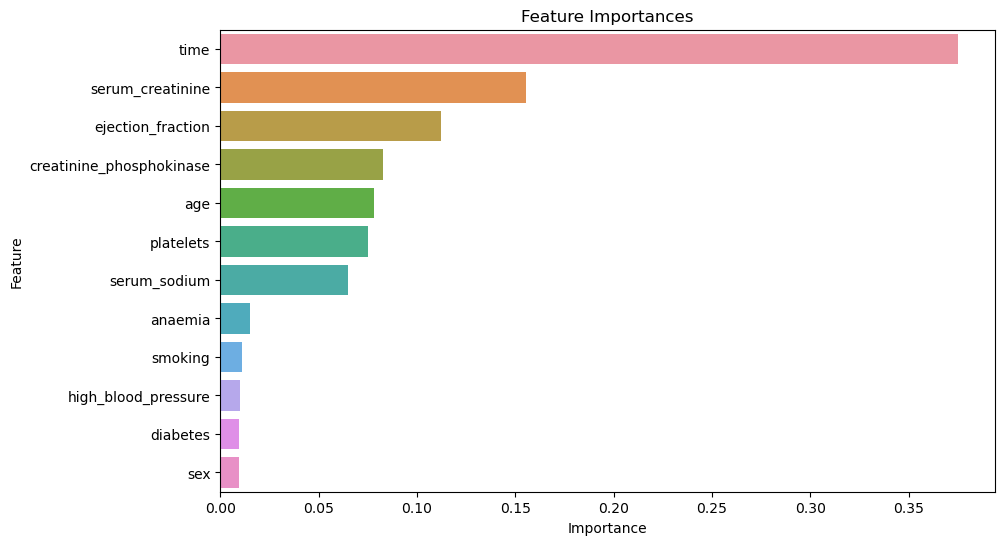

Top 4 features: ['time', 'serum_creatinine', 'ejection_fraction', 'creatinine_phosphokinase']
Logistic_Regression - Accuracy: 0.8, Precision: 0.8823529411764706, Recall: 0.6, AUC-ROC: 0.7714285714285715
Random_Forest - Accuracy: 0.7166666666666667, Precision: 0.7, Recall: 0.56, AUC-ROC: 0.6942857142857143
Gradient_Boosting - Accuracy: 0.7166666666666667, Precision: 0.7222222222222222, Recall: 0.52, AUC-ROC: 0.6885714285714286
Epoch 1/100
6/6 [==============================] - 4s 124ms/step - loss: 0.6881 - accuracy: 0.5812 - val_loss: 0.6546 - val_accuracy: 0.7292
Epoch 2/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6558 - accuracy: 0.6230 - val_loss: 0.6297 - val_accuracy: 0.7500
Epoch 3/100
6/6 [==============================] - 0s 30ms/step - loss: 0.6534 - accuracy: 0.6702 - val_loss: 0.6058 - val_accuracy: 0.7500
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 0.6241 - accuracy: 0.6911 - val_loss: 0.5811 - val_accuracy: 0.7500
Epoch 5/1

6/6 [==============================] - 0s 25ms/step - loss: 0.3781 - accuracy: 0.8325 - val_loss: 0.2880 - val_accuracy: 0.8750
Epoch 57/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3159 - accuracy: 0.8482 - val_loss: 0.2893 - val_accuracy: 0.8750
Epoch 58/100
6/6 [==============================] - 0s 24ms/step - loss: 0.3467 - accuracy: 0.8272 - val_loss: 0.2905 - val_accuracy: 0.8750
Epoch 59/100
6/6 [==============================] - 0s 24ms/step - loss: 0.3186 - accuracy: 0.8743 - val_loss: 0.2968 - val_accuracy: 0.8542
Epoch 60/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3379 - accuracy: 0.8429 - val_loss: 0.2955 - val_accuracy: 0.8542
Epoch 61/100
6/6 [==============================] - 0s 24ms/step - loss: 0.3360 - accuracy: 0.8429 - val_loss: 0.2914 - val_accuracy: 0.8750
Epoch 62/100
6/6 [==============================] - 0s 26ms/step - loss: 0.3284 - accuracy: 0.8482 - val_loss: 0.2875 - val_accuracy: 0.8750
Epoch 63/100
6/6 [========

C:\Users\potab\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Neural Network - Accuracy: 0.7833333611488342, Precision: 0.7727272727272727, Recall: 0.68, AUC-ROC: 0.7685714285714287
Logistic Regression - Accuracy: 0.7833333611488342, Precision: 0.9285714285714286, Recall: 0.52, AUC-ROC: 0.7457142857142858
Random Forest - Accuracy: 0.7833333611488342, Precision: 0.9285714285714286, Recall: 0.52, AUC-ROC: 0.7457142857142858
Gradient Boosting - Accuracy: 0.7833333611488342, Precision: 0.9285714285714286, Recall: 0.52, AUC-ROC: 0.7457142857142858
Neural Network - Accuracy: 0.7833333611488342, Precision: 0.7727272727272727, Recall: 0.68, AUC-ROC: 0.7685714285714287


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
import joblib

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

# Rename columns to match the image
data.columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                'smoking', 'time', 'DEATH_EVENT']

# Splitting the data
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

# Select top 4 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(4)['Feature']
print("Top 4 features:", top_features.tolist())
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the selected features
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Function to evaluate and save model
def evaluate_and_save_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    auc_roc = roc_auc_score(y_test, predictions)
    joblib.dump(model, f'{model_name}.joblib')
    print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")

# Logistic Regression with hyperparameter tuning
log_reg = LogisticRegression(random_state=42)
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
evaluate_and_save_model(grid_search, X_train_top_scaled, y_train, X_test_top_scaled, y_test, 'Logistic_Regression')

# Random Forest with hyperparameter tuning
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
evaluate_and_save_model(grid_search, X_train_top_scaled, y_train, X_test_top_scaled, y_test, 'Random_Forest')

# Gradient Boosting with hyperparameter tuning
gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
evaluate_and_save_model(grid_search, X_train_top_scaled, y_train, X_test_top_scaled, y_test, 'Gradient_Boosting')

# Enhanced Neural Network
model = Sequential([
    Dense(128, input_shape=(X_train_top_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_top_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = model.evaluate(X_test_top_scaled, y_test, verbose=1)
y_pred = (model.predict(X_test_top_scaled) > 0.5).astype("int32")
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_auc_roc = roc_auc_score(y_test, y_pred)
model.save('Neural_Network.h5')
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")

# Summarize results
print(f"Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")
print(f"Random Forest - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")
print(f"Gradient Boosting - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC-ROC: {auc_roc}")
print(f"Neural Network - Accuracy: {accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, AUC-ROC: {nn_auc_roc}")
